### About Aerofit

**Aerofit** is a leading brand in the field of fitness equipment, offering a wide range of products to meet the needs of all fitness enthusiasts. Their product portfolio includes:

- **Treadmills**
- **Exercise Bikes**
- **Gym Equipment**
- **Fitness Accessories**

Aerofit strives to provide high-quality equipment that caters to people of all fitness levels, ensuring a comprehensive fitness experience for everyone.


---
### Business Problem

The **market research team** at **Aerofit** is looking to identify the characteristics of the target audience for each type of treadmill offered by the company. This analysis will help provide better recommendations to new customers based on their needs. The team aims to investigate whether there are differences across the products in terms of customer characteristics.

#### Objective:
- Perform **descriptive analytics** to create a customer profile for each **Aerofit treadmill product**.
- Develop appropriate **tables** and **charts** to summarize the data.
- For each Aerofit treadmill product, construct **two-way contingency tables**.
- Compute all **conditional and marginal probabilities** and analyze their insights and potential **impact on the business**.
---

### Dataset

The company collected data on individuals who purchased a treadmill from **Aerofit** stores during the past three months. The dataset contains the following features:

- **Product Purchased**: KP281, KP481, or KP781
- **Age**: Age of the customer (in years)
- **Gender**: Male/Female
- **Education**: Number of years of education
- **MaritalStatus**: Single or partnered
- **Usage**: Average number of times the customer plans to use the treadmill each week
- **Income**: Annual income (in dollars)
- **Fitness**: Self-rated fitness on a scale from 1 to 5, where 1 is "poor shape" and 5 is "excellent shape"
- **Miles**: Average number of miles the customer expects to walk/run each week

#### Dataset Link:
[**Aerofit_treadmill.csv**](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)
---

### Product Portfolio

**Aerofit** offers three different treadmill models, each designed to cater to specific user needs:

- **KP281**: An entry-level treadmill priced at **$1,500**. Ideal for beginners or individuals looking for basic features.

- **KP481**: A mid-level treadmill designed for more experienced runners, priced at **$1,750**. It offers enhanced features for improved performance.

- **KP781**: A high-end treadmill with advanced features, priced at **$2,500**. Perfect for serious runners seeking top-of-the-line technology and performance.

Each product is tailored to meet the needs of different customer segments, offering a variety of options based on budget and fitness goals.
---
---

By - [**Govardhan**](www.linkedin.com/in/govardhan-s-n)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import plotly.io as pio
pio.renderers.default = 'svg'

In [46]:
pio.templates["plotly_dark_custom"] = pio.templates["plotly_dark"]
pio.templates["plotly_dark_custom"].layout.width = 950
pio.templates["plotly_dark_custom"].layout.height = 600
pio.templates.default = "plotly_dark_custom"

In [47]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# ***Basic Metrics***

In [48]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [49]:
df.shape

(180, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* No Null Values

In [51]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


* Income,Miles,Age --> (Continues Data) with Some Outliers

* -- as we have only 180 rows we dont remove them

# ***Categorize The Variables***

In [52]:
def categories_range(bins,labels):
  for i in range(len(labels)):
    print(f"{bins[i]} - {bins[i+1]} ==> {labels[i]}")

In [53]:
bins = [14, 25, 35, 50]
labels = ['14-25', '26-35', '36-50']
categories_range(bins,labels)
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels,right=True)
df['Age_Group'].value_counts(normalize=True)

14 - 25 ==> 14-25
25 - 35 ==> 26-35
35 - 50 ==> 36-50


,proportion
Age_Group,
14-25,0.438889
26-35,0.405556
36-50,0.155556


In [54]:
bins = [11, 16, 18, 21]
labels = ['UG', 'PG', 'PHD']
categories_range(bins,labels)
df['Education_Category'] = pd.cut(df['Education'], bins=bins, labels=labels,right=True)
df['Education_Category'].value_counts(normalize=True)

11 - 16 ==> UG
16 - 18 ==> PG
18 - 21 ==> PHD


,proportion
Education_Category,
UG,0.850000
PG,0.127778
PHD,0.022222


In [55]:
per = np.percentile(df['Income'],np.linspace(0,100,4)).astype('int')
labels=['Low Income', 'Middle Income', 'High Income']
categories_range(per,labels)
bins = [29000,45000,55000,110000] #Based On Quantiles
df['Income_Category'] = pd.cut(df['Income'], bins=bins, labels=labels,right=False)
df['Income_Category'].value_counts(normalize=True)

29562 - 45480 ==> Low Income
45480 - 54576 ==> Middle Income
54576 - 104581 ==> High Income


,proportion
Income_Category,
Middle Income,0.427778
High Income,0.300000
Low Income,0.272222


In [56]:
bins = [20,80,150,380]
labels = ['Low Miles', 'Moderate Miles', 'High Miles']
categories_range(bins,labels)
df['Miles_Category'] = pd.cut(df['Miles'], bins=bins, labels=labels,right=True)
df['Miles_Category'].value_counts(normalize=True)

20 - 80 ==> Low Miles
80 - 150 ==> Moderate Miles
150 - 380 ==> High Miles


,proportion
Miles_Category,
Moderate Miles,0.511111
Low Miles,0.333333
High Miles,0.155556


# ***Check Data***

In [57]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0
Age_Group,0


In [58]:
df.duplicated().sum()

0

# ***Understand The Data***

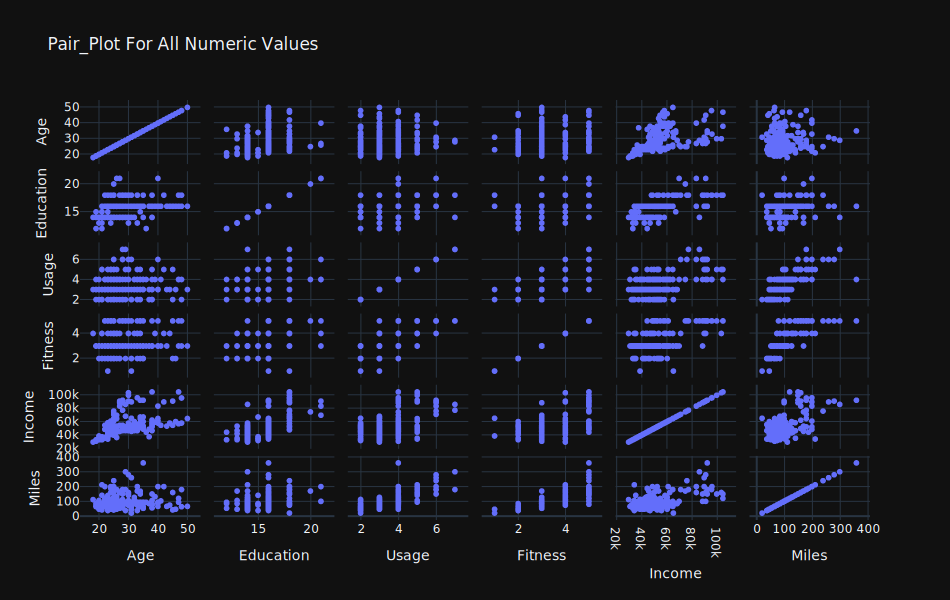

In [59]:
px.scatter_matrix(df, dimensions=df.select_dtypes(include=['number']).columns,title="Pair_Plot For All Numeric Values")

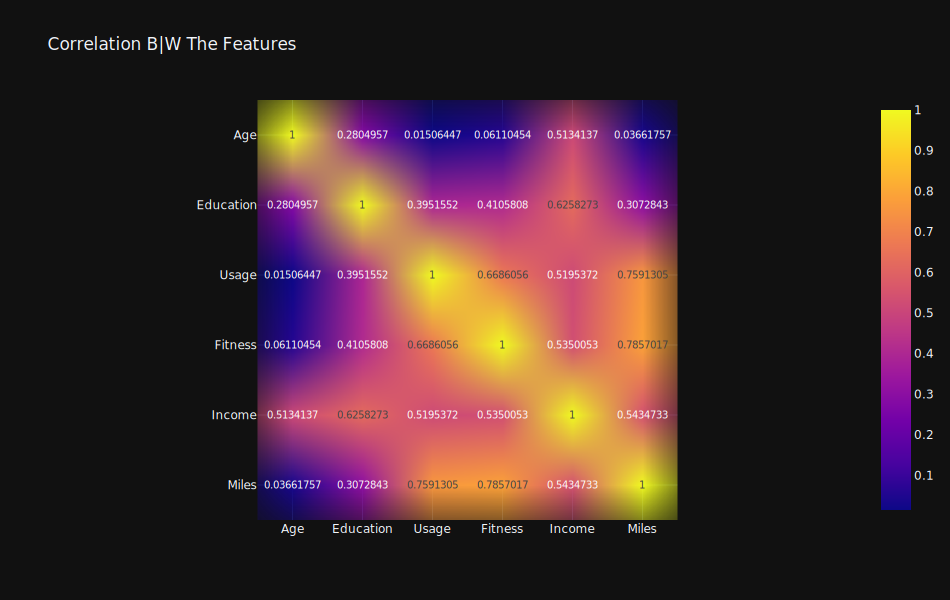

In [60]:
title = 'Correlation B|W The Features'
px.imshow(df.select_dtypes(include=['number']).corr(),text_auto=True,title=title)

- **Income** and **Age** *positively* correlated

- **Eductaion** and **Income** are *highly* correlated.

- **Eductation** correlats with **Fitness** rating and Usage

- Usage is **highly** correlated with **Fitness** and **Miles**

- **More** the **Usage** more the **Fitness** and **Mileage**.

In [61]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37
Age_Group,3


<Axes: ylabel='count'>

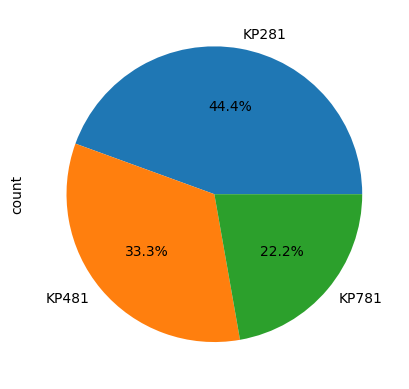

In [62]:
df['Product'].value_counts().plot(kind='pie',autopct='%1.1f%%')

The Marginal Probability That a New Person Choosing each Products IS:-
*   P(KP281) = 0.444
*   P(KP481) = 0.333
*   P(KP781) = 0.222

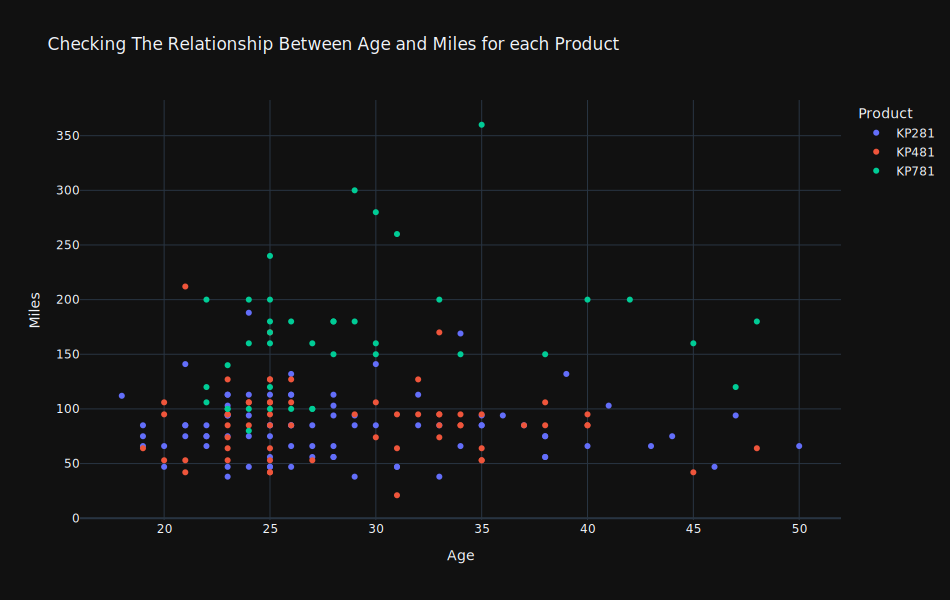

In [63]:
title = "Checking The Relationship Between Age and Miles for each Product"
px.scatter(df,x='Age',y='Miles',color='Product',title=title)

*   NO Relationship (Age Is Randomly
Distributed)

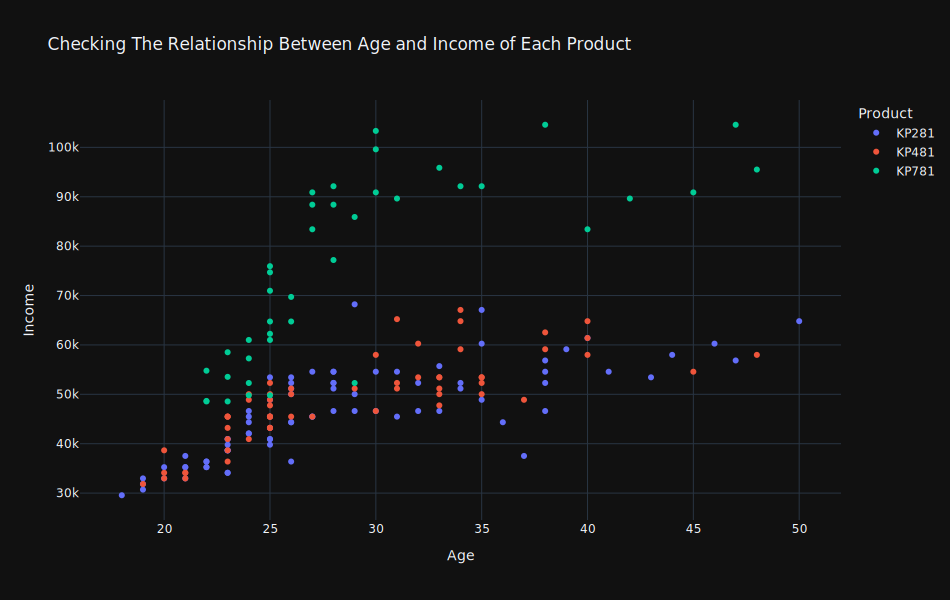

In [64]:
title = "Checking The Relationship Between Age and Income of Each Product"
px.scatter(df,x='Age',y='Income',color='Product',title=title)

*  Income Is Randomly distributed for the Products (KP281,KP241)
*  But High Income People Bye KP781
*  As People Age More There Income Is Rising

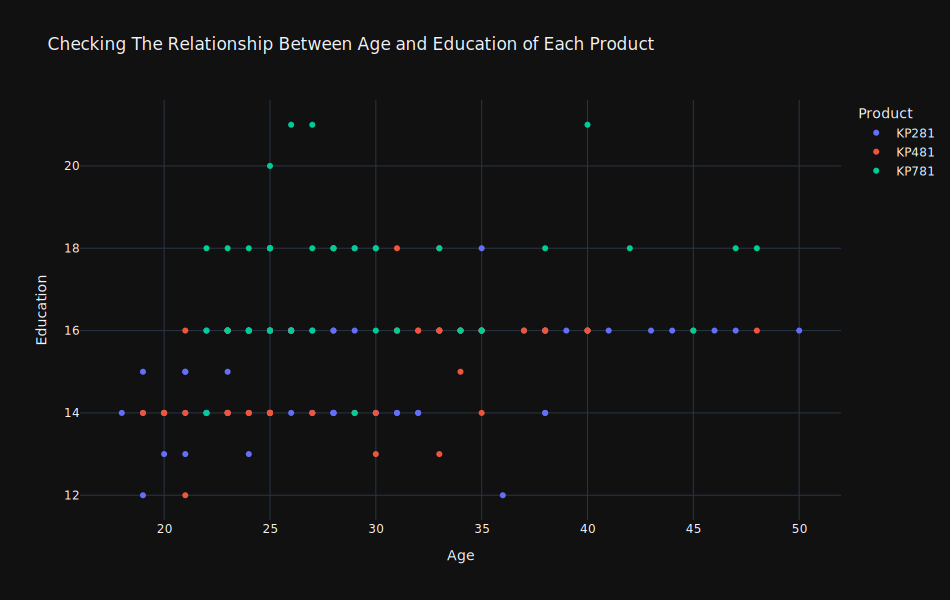

In [65]:
title = "Checking The Relationship Between Age and Education of Each Product"
px.scatter(df,x='Age',y='Education',color='Product',title=title)

* Most People Buy The Product Just After Completing There Education
* People Who Completed Education More Than 16 Years are Buying KP781

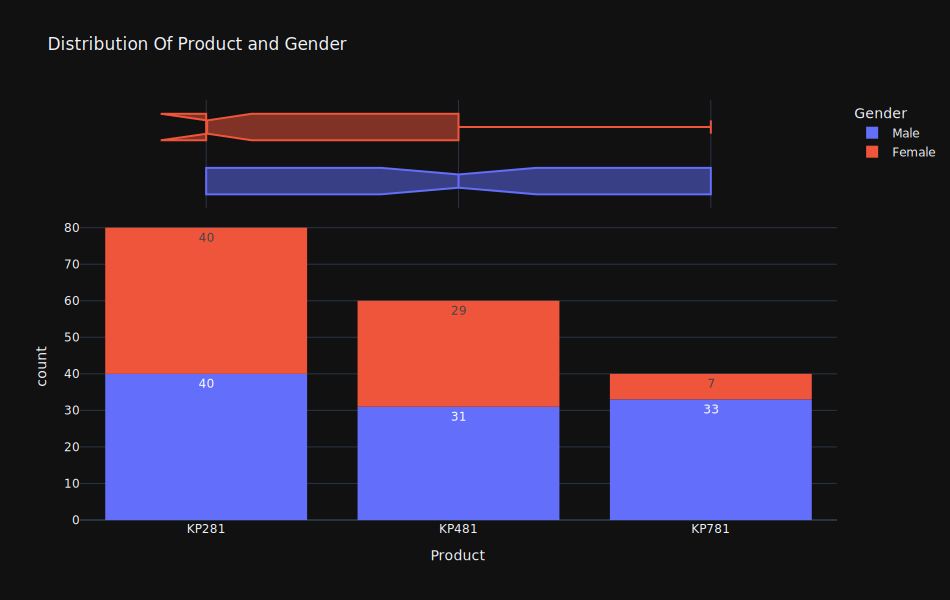

In [66]:
title = "Distribution Of Product and Gender"
px.histogram(df,x='Product',color='Gender',title=title,text_auto=True,marginal="box")

*  For The Products KP281 and KP481 The Gender Ratio is equal
*  If Someone IS a Male And With High income Then There Is Very High Chance That He will Buy KP781 Than female Buying it

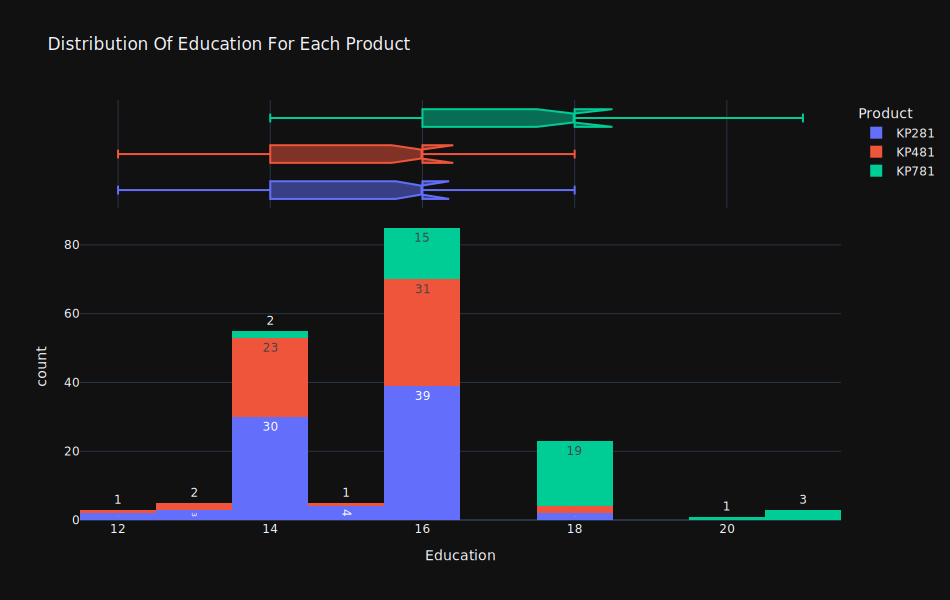

In [67]:
title = "Distribution Of Education For Each Product"
px.histogram(df,x='Education',color='Product',text_auto=True,marginal="box",title=title)

* Data Is Limited But The Probability Of Buying KP781 increases As People Complete More Years OF Education


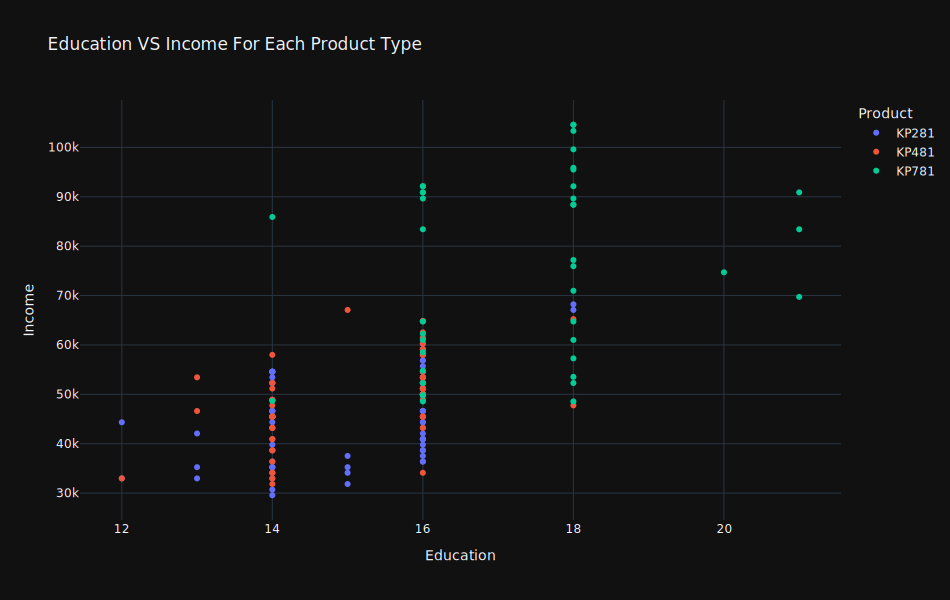

In [68]:
title = "Education VS Income For Each Product Type"
px.scatter(df,x='Education',y='Income',color='Product',title=title)

* More The Education More Someone Earns
* More The Education More Income => High likelihood Of buying KP781

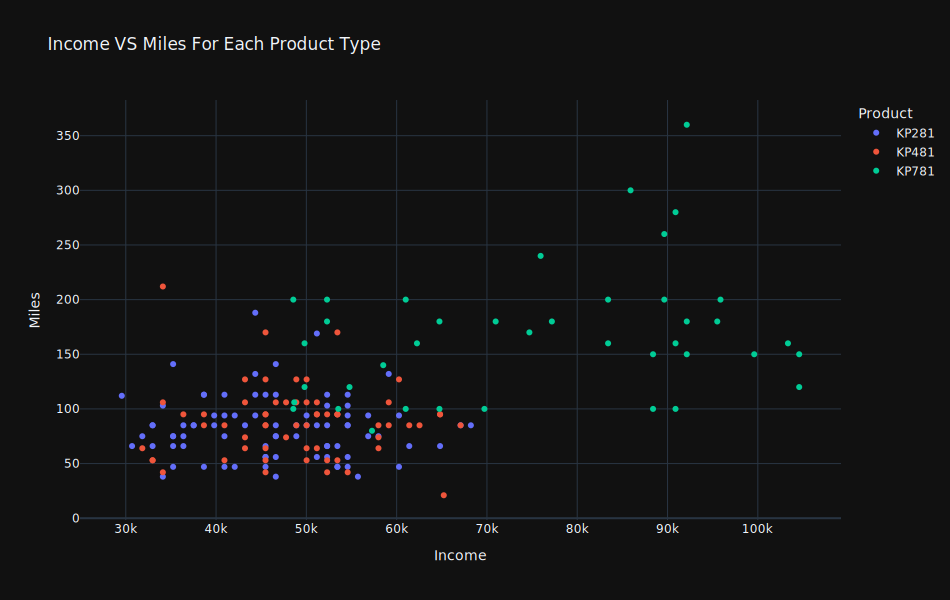

In [69]:
title = "Income VS Miles For Each Product Type"
px.scatter(df,x='Income',y='Miles',color='Product',title=title)

* For The Products (KP281,KP481) Income VS Miles Is Random
* But People With More Income Runs More Miles So They Buy(KP781)
* Hence More The Education More Income More The Miles They Run => High likelihood Of buying KP781

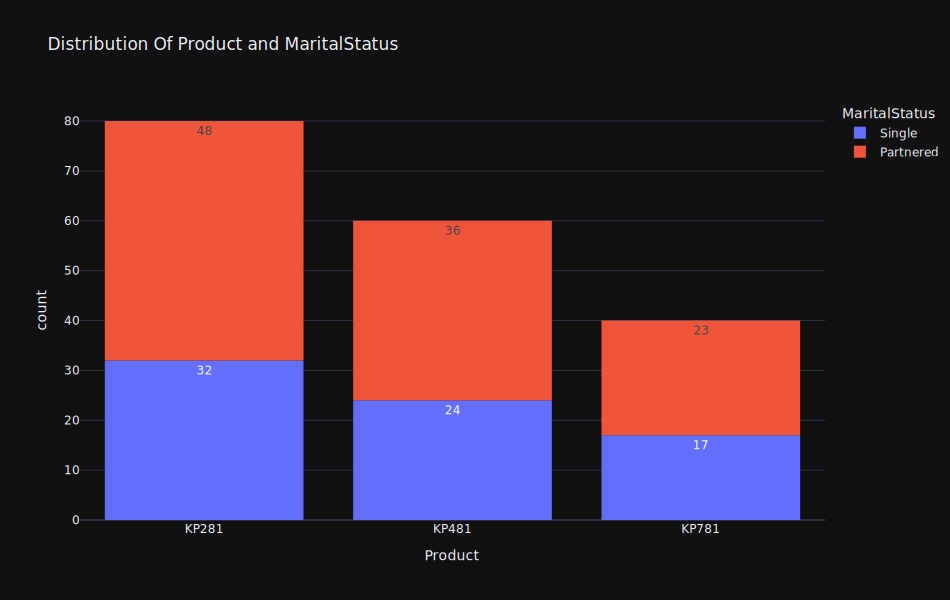

In [70]:
title = "Distribution Of Product and MaritalStatus"
px.histogram(df,x='Product',color='MaritalStatus',title=title,text_auto=True)

* Married People Buy More Compared To Single

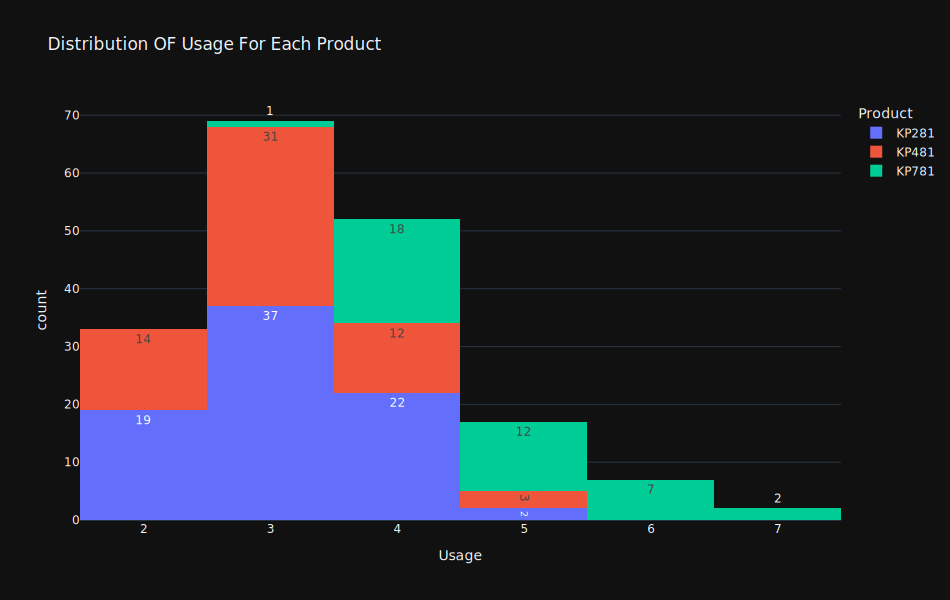

In [71]:
title = "Distribution OF Usage For Each Product"
px.histogram(df,x='Usage',color='Product',text_auto=True,title=title)

* KP781 Are Bought By People Who Use More than 4 days/Week

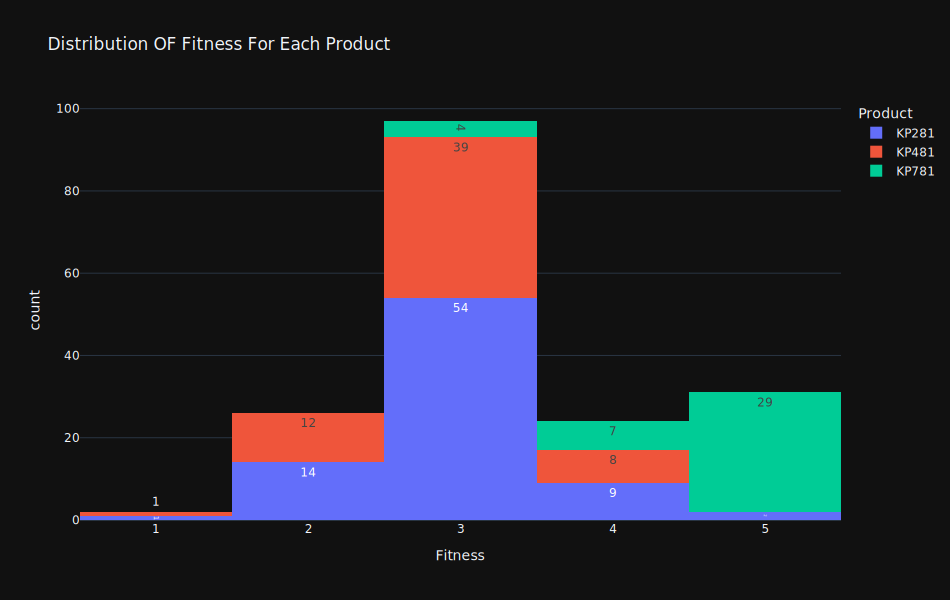

In [72]:
title = "Distribution OF Fitness For Each Product"
px.histogram(df,x='Fitness',color='Product',text_auto=True,title=title)

* Fit People Are Buying KP781

#***Analysis Of Each Product Probabilities***

In [73]:
def prob_plot(col,barmode='group'):
  print(f"{col} (Marginal and Joint Probabilities)")
  print(f"P({col} ∩ Product) = ")
  display(pd.crosstab(df[col],df['Product'],normalize=True,margins=True).style.format("{:.2%}"))
  title = f"Probability OF Buying Each Product BY The {col} P({col} ∩ KP*81)"
  b = df[['Product',col]].value_counts(normalize=True).reset_index()
  b['proportion'] = b['proportion'].round(2)
  fig = px.bar(b,x=col,y='proportion',color='Product',text_auto=True,title=title,barmode='stack')
  fig.show()
  print(f"\n\n#{col} (Conditional Probabilities)")
  print(f"P(Product|{col}) = ")
  display(pd.crosstab(df[col],df['Product'],normalize='index',margins=True).style.format("{:.2%}"))
  title = f"Probability OF Buying Each Product Given The {col} P(KP*81|{col})"
  a=df.groupby([col,'Product'],as_index=False).size()
  a['sum'] =  a.groupby(col)['size'].transform('sum')
  a['Probability'] = ((a['size']/a['sum'])).round(2)
  fig = px.bar(a,x=col,y='Probability',color='Product',text_auto=True,title=title,barmode=barmode)
  fig.show()

def prob_plot2(col,barmode='group'):
  c = ','.join(col)
  title = f"Probability OF Buying Each Product Given The {c} P(KP*81|{c})"
  print(f"\n\n#{c} (Conditional Probabilities)")
  print(f"P(Product|{c}) = ")
  pag = pd.crosstab(index=[df[col[0]],df[col[1]]],columns=df['Product'],normalize='index')
  display(pag.style.format("{:.2%}"))
  pag=pag.reset_index().melt(id_vars=col,value_name='Probability',var_name='Product')
  pag['Probability'] = pag['Probability'].round(2)
  fig = px.bar(pag,x=col[0],y='Probability',color='Product',facet_col=col[1],text_auto=True,barmode=barmode,title=title)
  fig.show()





Age_Group (Marginal and Joint Probabilities)
P(Age_Group ∩ Product) = 


Product,KP281,KP481,KP781,All
Age_Group,,,,
14-25,18.89%,15.56%,9.44%,43.89%
26-35,17.78%,13.33%,9.44%,40.56%
36-50,7.78%,4.44%,3.33%,15.56%
All,44.44%,33.33%,22.22%,100.00%


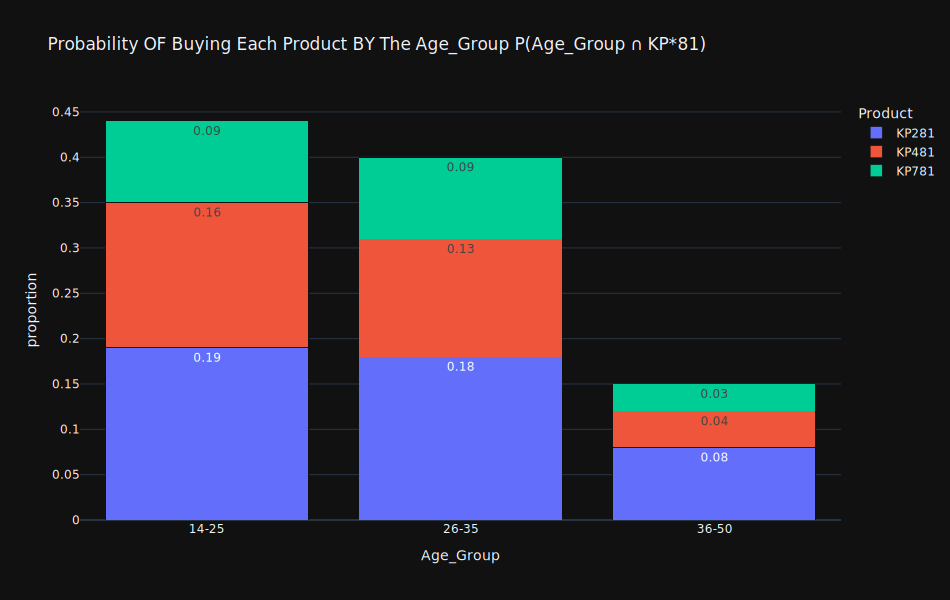



#Age_Group (Conditional Probabilities)
P(Product|Age_Group) = 


Product,KP281,KP481,KP781
Age_Group,,,
14-25,43.04%,35.44%,21.52%
26-35,43.84%,32.88%,23.29%
36-50,50.00%,28.57%,21.43%
All,44.44%,33.33%,22.22%


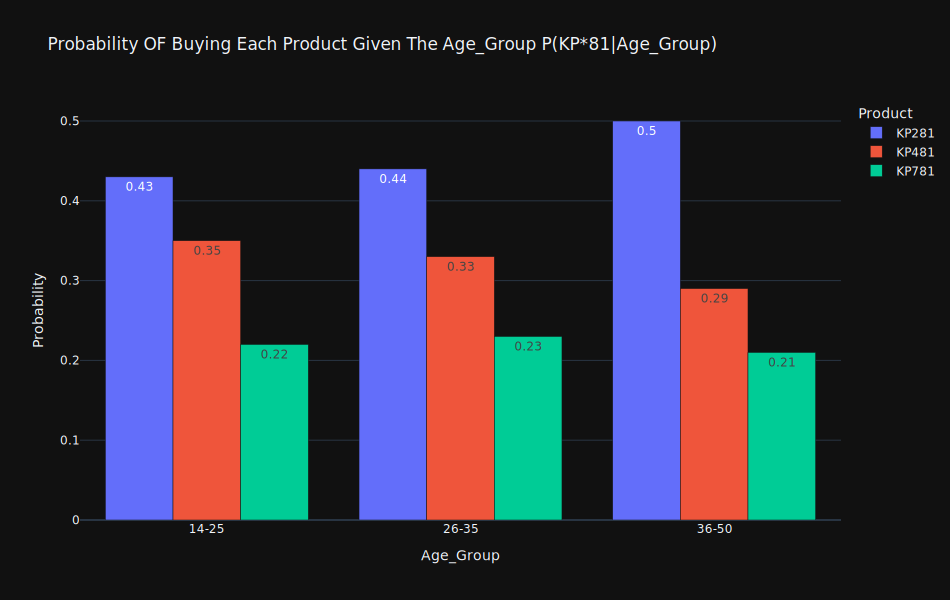

In [74]:
#Age Group
prob_plot('Age_Group')

1. ***Marginal***
  * **14-25**: **Strong** preference for KP281 **(18.89%)** and KP481 **(15.56%)**.
  * **26-35**: Balanced preference for KP281 **(17.78%)** and KP481 **(13.33%)**.
  * **36-50**: Low overall contribution, highest for KP281: **(7.78%)**.


---


2. ***Conditional***

- **KP281**:  
  - **14-25**: Probability **slightly decreases** from 44.4% to **43.04%**.  
  - **26-35**: Probability remains almost unchanged at **43.84%**.  
  - **36-50**: Probability **significantly increases** to **50%**, showing the strongest preference.

- **KP481**:  
  - **14-25**: Probability **slightly increases** from 33.3% to **35.44%**.  
  - **26-35**: Probability **slightly decreases** to **32.88%**.  
  - **36-50**: Probability **drops significantly** to **28.57%**, indicating less interest.

- **KP781**:  
  - **14-25**: Probability **slightly decreases** from 22.2% to **21.52%**.  
  - **26-35**: Probability **marginally increases** to **23.29%**.  
  - **36-50**: Probability remains almost unchanged at **21.43%**.

Gender (Marginal and Joint Probabilities)
P(Gender ∩ Product) = 


Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.22%,16.11%,3.89%,42.22%
Male,22.22%,17.22%,18.33%,57.78%
All,44.44%,33.33%,22.22%,100.00%


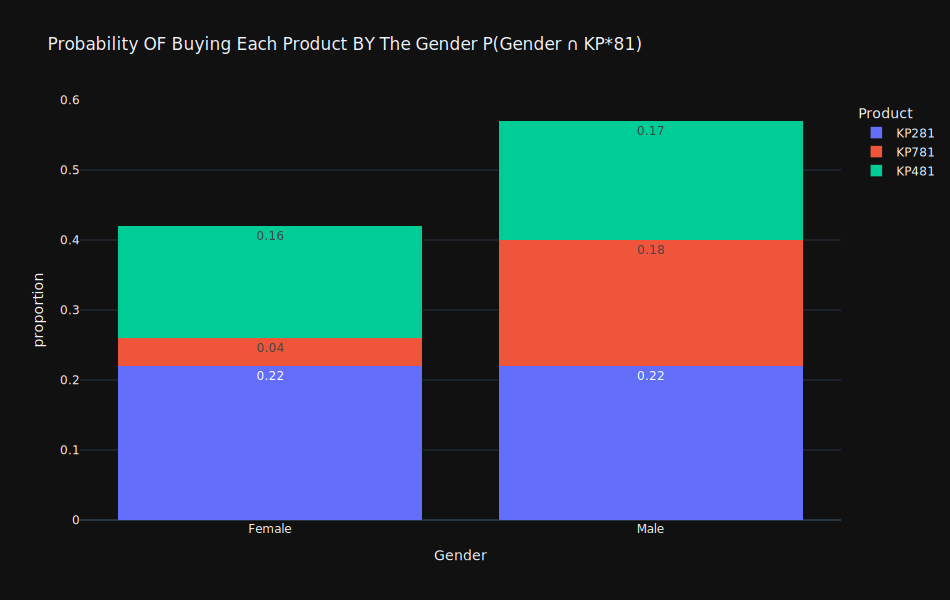



#Gender (Conditional Probabilities)
P(Product|Gender) = 


Product,KP281,KP481,KP781
Gender,,,
Female,52.63%,38.16%,9.21%
Male,38.46%,29.81%,31.73%
All,44.44%,33.33%,22.22%


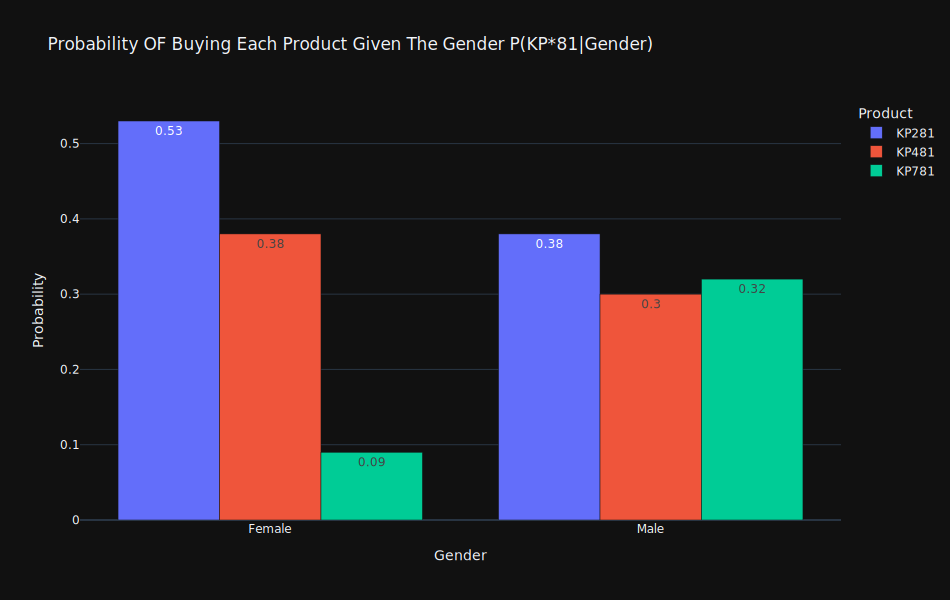

In [75]:
#Gender
prob_plot('Gender')

1. ***Marginal and Joint Probabilities***
- **Female Customers**:  
  - **KP281**: Joint probability is **22.22%**.  
  - **KP481**: Joint probability is **16.11%**.  
  - **KP781**: Joint probability is the lowest at **3.89%**.  
  - Total contribution: **42.22%**.

- **Male Customers**:  
  - **KP281**: Joint probability is **22.22%**.  
  - **KP481**: Joint probability is **17.22%**.  
  - **KP781**: Joint probability is the highest at **18.33%**.  
  - Total contribution: **57.78%**.

---

2. ***Conditional Probabilities***

- **KP281**:  
  - **Female Customers**: Probability increases to **52.63%**, showing the strongest preference.  
  - **Male Customers**: Probability is **38.46%**, lower compared to females.

- **KP481**:  
  - **Female Customers**: Probability increases to **38.16%**, moderate interest.  
  - **Male Customers**: Probability is **29.81%**, showing less preference compared to females.

- **KP781**:  
  - **Female Customers**: Probability is the lowest at **9.21%**, indicating minimal interest.  
  - **Male Customers**: Probability increases significantly to **31.73%**, the highest among the three products.

Education_Category (Marginal and Joint Probabilities)
P(Education_Category ∩ Product) = 


Product,KP281,KP481,KP781,All
Education_Category,,,,
UG,43.33%,32.22%,9.44%,85.00%
PG,1.11%,1.11%,10.56%,12.78%
PHD,0.00%,0.00%,2.22%,2.22%
All,44.44%,33.33%,22.22%,100.00%


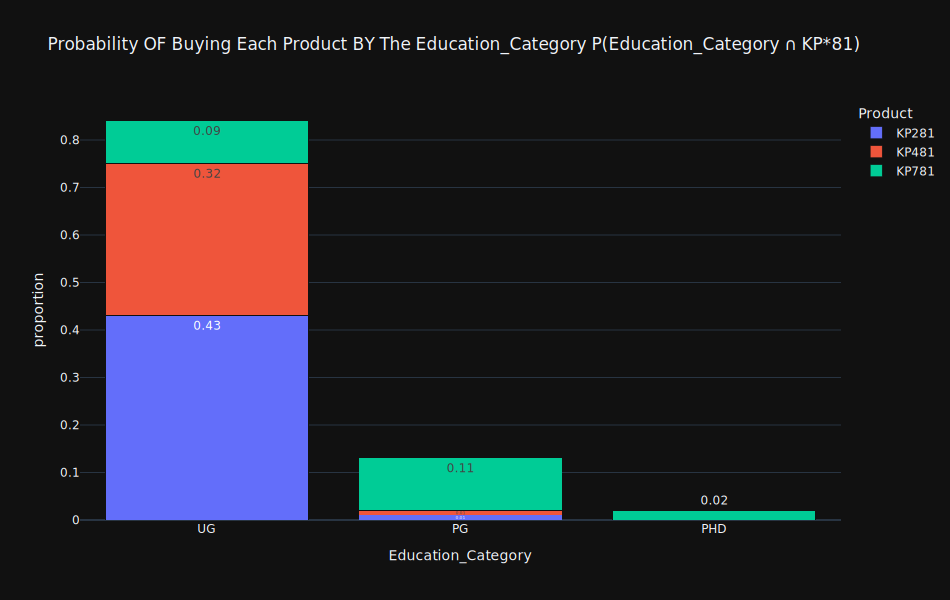



#Education_Category (Conditional Probabilities)
P(Product|Education_Category) = 


Product,KP281,KP481,KP781
Education_Category,,,
UG,50.98%,37.91%,11.11%
PG,8.70%,8.70%,82.61%
PHD,0.00%,0.00%,100.00%
All,44.44%,33.33%,22.22%


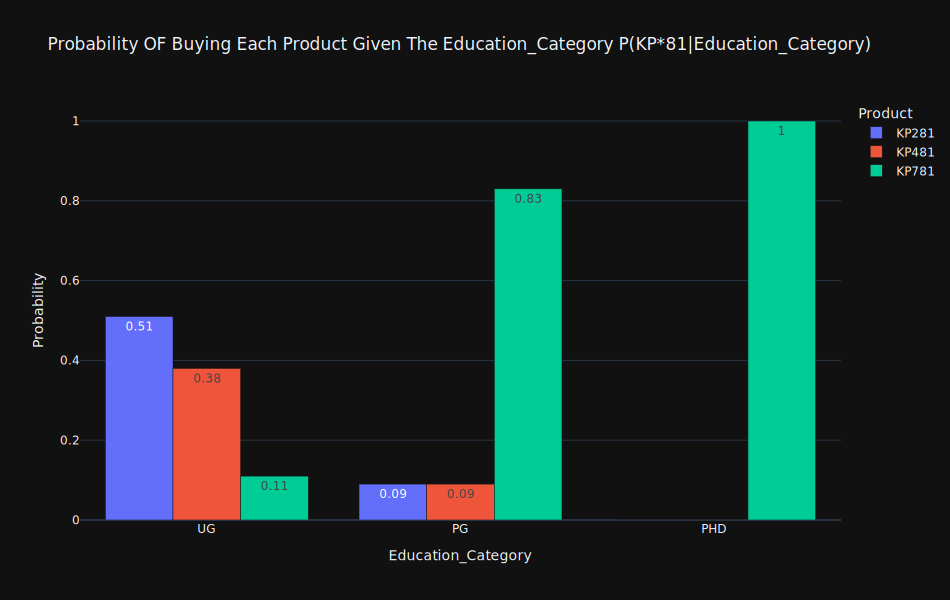

In [76]:
prob_plot('Education_Category')

1. ***Marginal Probabilities***

- **UG (Undergraduate)**:

  - **KP281**: Joint probability is **43.33%**, the highest among all education categories.
  - **KP481**: Joint probability is **32.22%**.
  - **KP781**: Joint probability is **9.44%**, the lowest for UG.
  - Total contribution: **85.00%** of the dataset.

- **PG (Postgraduate)**:

  - **KP281**: Joint probability is **1.11%**.
  - **KP481**: Joint probability is also **1.11%**.
  - **KP781**: Joint probability is **10.56%**, the highest for PG.
  - Total contribution: **12.78%** of the dataset.

- **PHD**:

  - **KP281** and **KP481**: Joint probabilities are **0%**.
  - **KP781**: Joint probability is **2.22%**, representing all PHD preferences.
  - Total contribution: **2.22%** of the dataset.

---

2. ***Conditional Probabilities***

- **UG (Undergraduate)**:

  - **KP281**: Probability is **50.98%**, showing the strongest preference.
  - **KP481**: Probability is **37.91%**, indicating moderate interest.
  - **KP781**: Probability is **11.11%**, the least preferred.

- **PG (Postgraduate)**:

  - **KP281**: Probability is only **8.70%**, showing very low interest.
  - **KP481**: Probability matches KP281 at **8.70%**.
  - **KP781**: Probability is the highest at **82.61%**, indicating strong dominance.

- **PHD**:

  - **KP781**: Probability is **100%**, as all PHD customers exclusively choose this product.

---

***Key Insights:***

- **UG Customers**:

  - Strong preference for **KP281** (**50.98%**) and moderate interest in **KP481** (**37.91%**).
  - Least likely to choose **KP781** (**11.11%**).

- **PG Customers**:

  - Overwhelming preference for **KP781** (**82.61%**), with minimal interest in other products.

- **PHD Customers**:

  - Exclusively choose **KP781**, with no interest in other products.



Income_Category (Marginal and Joint Probabilities)
P(Income_Category ∩ Product) = 


Product,KP281,KP481,KP781,All
Income_Category,,,,
Low Income,18.89%,8.33%,0.00%,27.22%
Middle Income,19.44%,18.33%,5.00%,42.78%
High Income,6.11%,6.67%,17.22%,30.00%
All,44.44%,33.33%,22.22%,100.00%


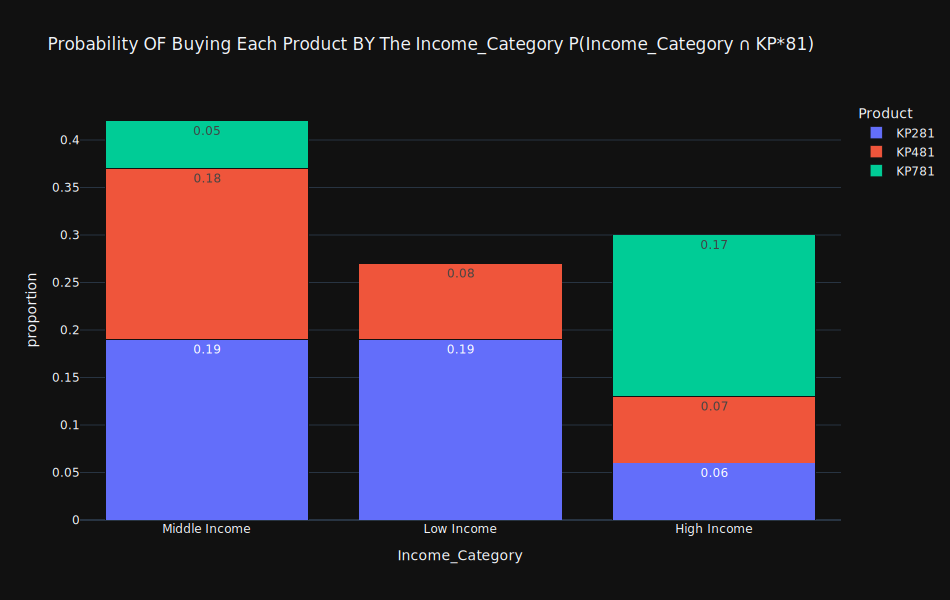



#Income_Category (Conditional Probabilities)
P(Product|Income_Category) = 


Product,KP281,KP481,KP781
Income_Category,,,
Low Income,69.39%,30.61%,0.00%
Middle Income,45.45%,42.86%,11.69%
High Income,20.37%,22.22%,57.41%
All,44.44%,33.33%,22.22%


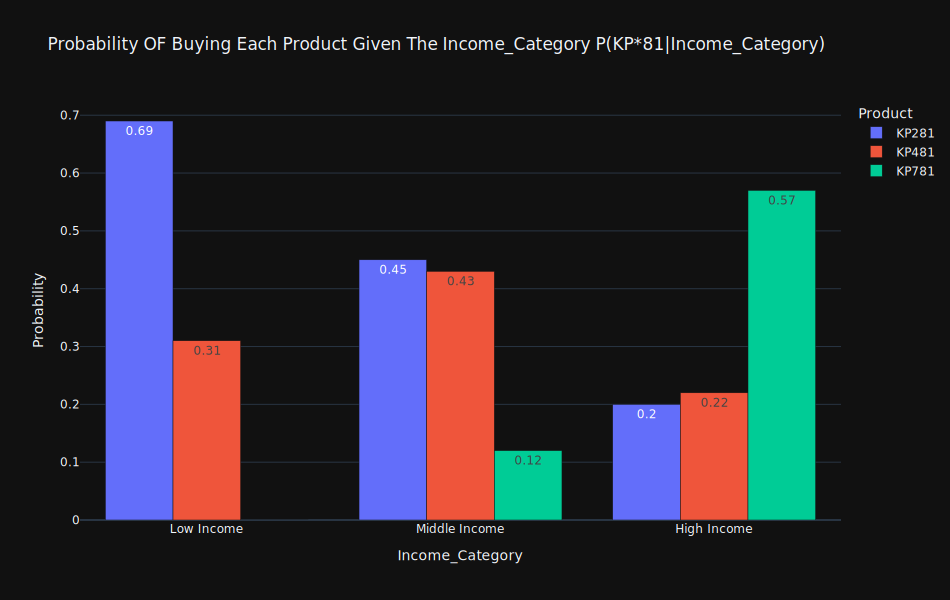

In [77]:
prob_plot('Income_Category')

1. ***Marginal Probabilities***

- **Low Income**:
  - **KP281**: Joint probability is **18.89%**, the highest among low-income groups.
  - **KP481**: Joint probability is **8.33%**.
  - **KP781**: Joint probability is **0%**, showing no preference for this product.
  - Total contribution: **27.22%** of the dataset.

- **Middle Income**:
  - **KP281**: Joint probability is **19.44%**, slightly higher than **KP481**.
  - **KP481**: Joint probability is **18.33%**.
  - **KP781**: Joint probability is **5.00%**.
  - Total contribution: **42.78%** of the dataset, the highest among all income categories.

- **High Income**:
  - **KP281**: Joint probability is **6.11%**.
  - **KP481**: Joint probability is **6.67%**.
  - **KP781**: Joint probability is **17.22%**, showing a strong preference for this product.
  - Total contribution: **30.00%** of the dataset.

---

2. ***Conditional Probabilities***

- **Low Income**:
  - **KP281**: Probability is **69.39%**, the highest preference for this group.
  - **KP481**: Probability is **30.61%**, indicating moderate interest.
  - **KP781**: Probability is **0%**, showing no interest in this product.

- **Middle Income**:
  - **KP281**: Probability is **45.45%**, slightly stronger preference compared to **KP481**.
  - **KP481**: Probability is **42.86%**, close to KP281.
  - **KP781**: Probability is **11.69%**, the least preferred.

- **High Income**:
  - **KP281**: Probability is **20.37%**, the lowest preference among high-income groups.
  - **KP481**: Probability is **22.22%**.
  - **KP781**: Probability is **57.41%**, the dominant choice for this group.

---

***Key Insights:***

- **Low-Income Customers**:
  - Strong preference for **KP281** (**69.39%**).
  - Moderate interest in **KP481** (**30.61%**).
  - No interest in **KP781** (**0%**).

- **Middle-Income Customers**:
  - Preference is relatively balanced between **KP281** (**45.45%**) and **KP481** (**42.86%**).
  - Least likely to choose **KP781** (**11.69%**).

- **High-Income Customers**:
  - Overwhelming preference for **KP781** (**57.41%**).
  - Moderate interest in **KP481** (**22.22%**).
  - Lowest preference for **KP281** (**20.37%**).

---




Miles_Category (Marginal and Joint Probabilities)
P(Miles_Category ∩ Product) = 


Product,KP281,KP481,KP781,All
Miles_Category,,,,
Low Miles,21.11%,11.67%,0.56%,33.33%
Moderate Miles,22.22%,20.00%,8.89%,51.11%
High Miles,1.11%,1.67%,12.78%,15.56%
All,44.44%,33.33%,22.22%,100.00%


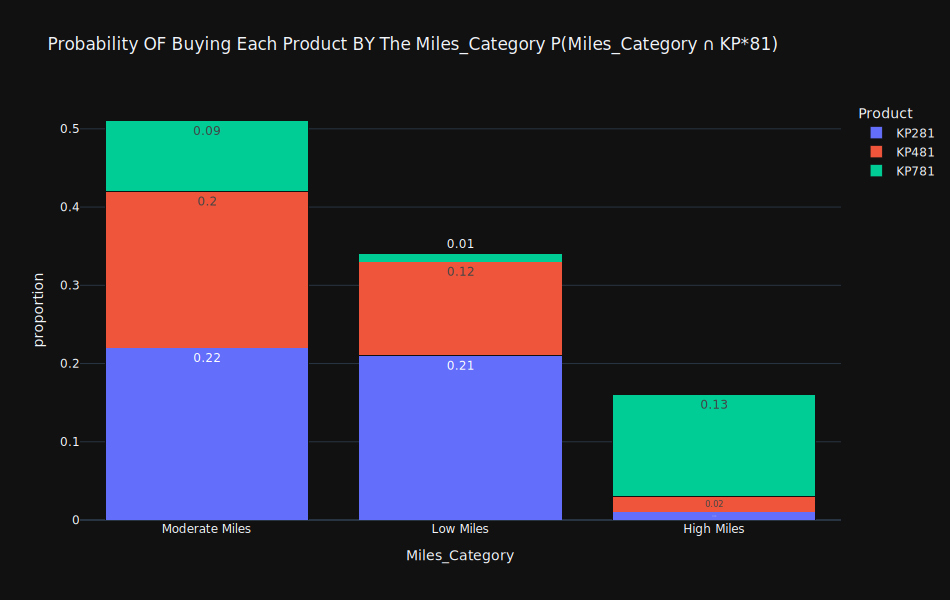



#Miles_Category (Conditional Probabilities)
P(Product|Miles_Category) = 


Product,KP281,KP481,KP781
Miles_Category,,,
Low Miles,63.33%,35.00%,1.67%
Moderate Miles,43.48%,39.13%,17.39%
High Miles,7.14%,10.71%,82.14%
All,44.44%,33.33%,22.22%


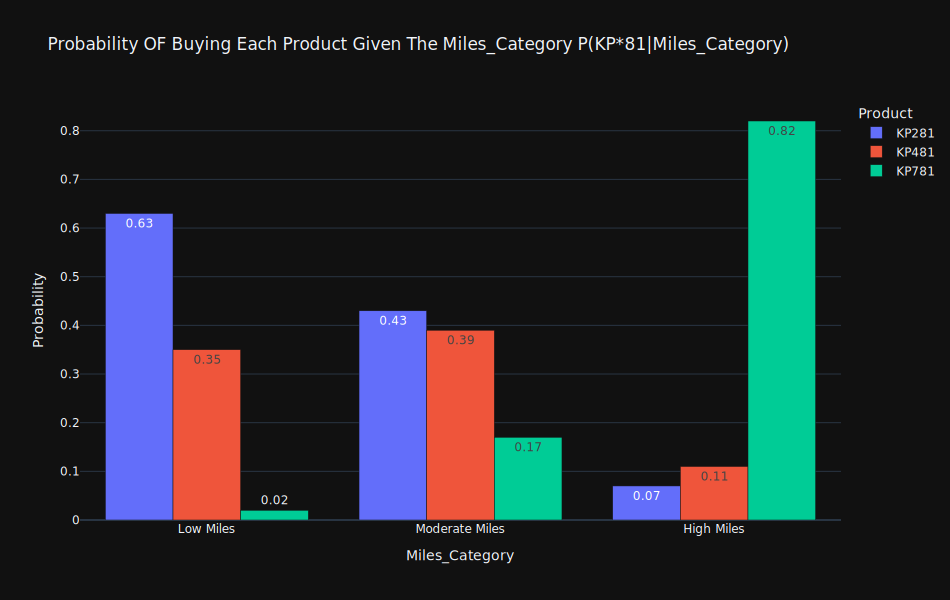

In [78]:
prob_plot('Miles_Category')

***Key Insights:***

- **Low Miles Customers**:
  - Strong preference for **KP281** (**63.33%**).
  - Significant interest in **KP481** (**35.00%**).
  - Minimal interest in **KP781** (**1.67%**).

- **Moderate Miles Customers**:
  - Preference is relatively balanced between **KP281** (**43.48%**) and **KP481** (**39.13%**).
  - Moderate interest in **KP781** (**17.39%**).

- **High Miles Customers**:
  - Overwhelming preference for **KP781** (**82.14%**).
  - Low interest in **KP481** (**10.71%**).
  - Least likely to choose **KP281** (**7.14%**).

---




MaritalStatus (Marginal and Joint Probabilities)
P(MaritalStatus ∩ Product) = 


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.67%,20.00%,12.78%,59.44%
Single,17.78%,13.33%,9.44%,40.56%
All,44.44%,33.33%,22.22%,100.00%


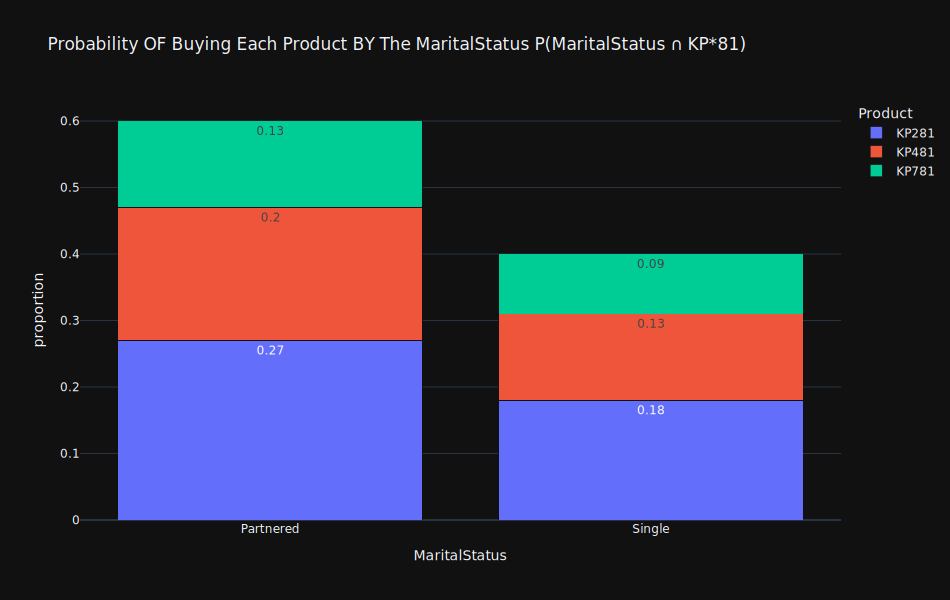



#MaritalStatus (Conditional Probabilities)
P(Product|MaritalStatus) = 


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.86%,33.64%,21.50%
Single,43.84%,32.88%,23.29%
All,44.44%,33.33%,22.22%


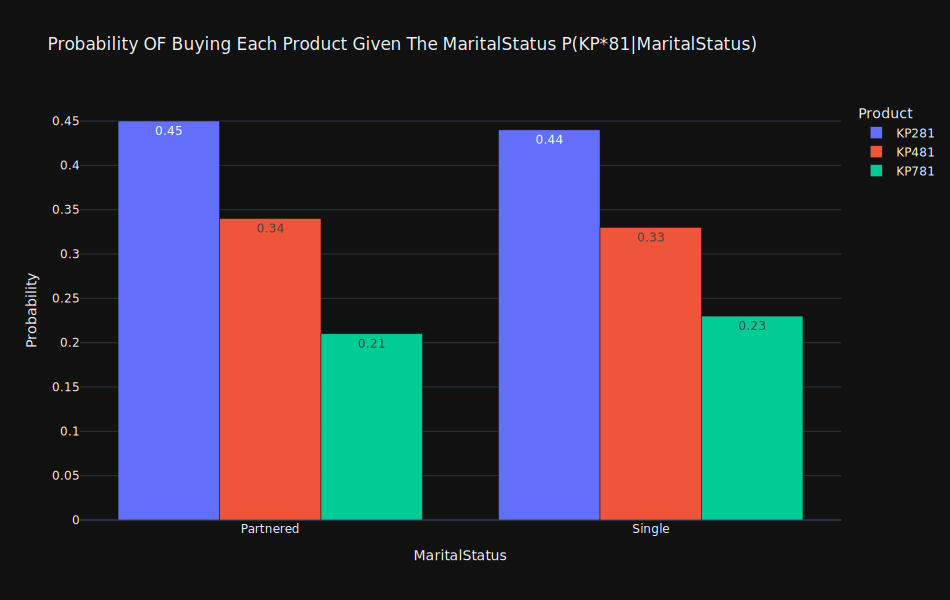

In [79]:
prob_plot('MaritalStatus')

***Key Insights:***

- **Partnered Customers**:
  - **KP281** is the most preferred product (**44.86%**).
  - Moderate interest in **KP481** (**33.64%**).
  - Least interest in **KP781** (**21.50%**).

- **Single Customers**:
  - Slightly less inclined towards **KP281** (**43.84%**) compared to partnered customers.
  - Similar preference for **KP481** (**32.88%**).
  - Higher preference for **KP781** (**23.29%**) than partnered customers.

---


Usage (Marginal and Joint Probabilities)
P(Usage ∩ Product) = 


Product,KP281,KP481,KP781,All
Usage,,,,
2,10.56%,7.78%,0.00%,18.33%
3,20.56%,17.22%,0.56%,38.33%
4,12.22%,6.67%,10.00%,28.89%
5,1.11%,1.67%,6.67%,9.44%
6,0.00%,0.00%,3.89%,3.89%
7,0.00%,0.00%,1.11%,1.11%
All,44.44%,33.33%,22.22%,100.00%


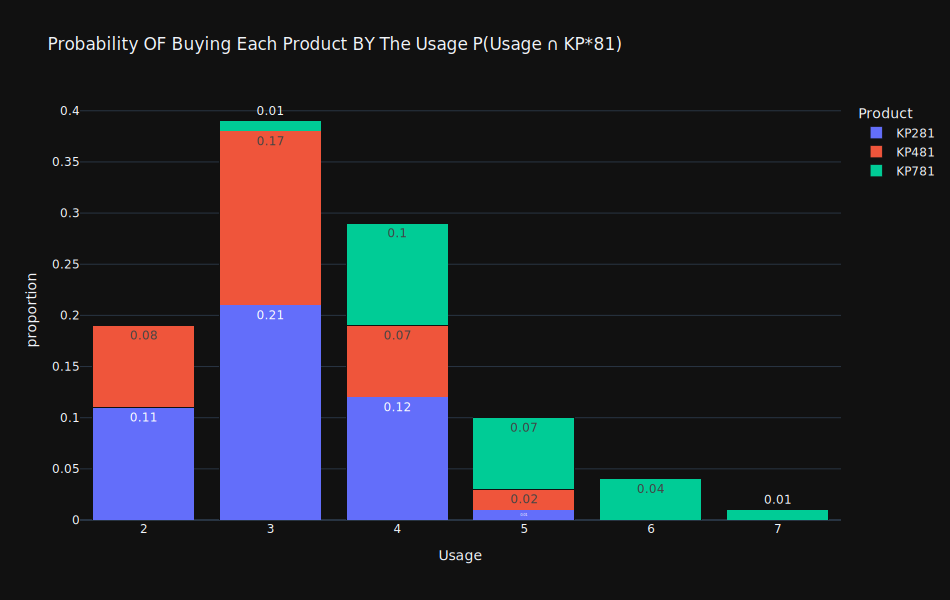



#Usage (Conditional Probabilities)
P(Product|Usage) = 


Product,KP281,KP481,KP781
Usage,,,
2,57.58%,42.42%,0.00%
3,53.62%,44.93%,1.45%
4,42.31%,23.08%,34.62%
5,11.76%,17.65%,70.59%
6,0.00%,0.00%,100.00%
7,0.00%,0.00%,100.00%
All,44.44%,33.33%,22.22%


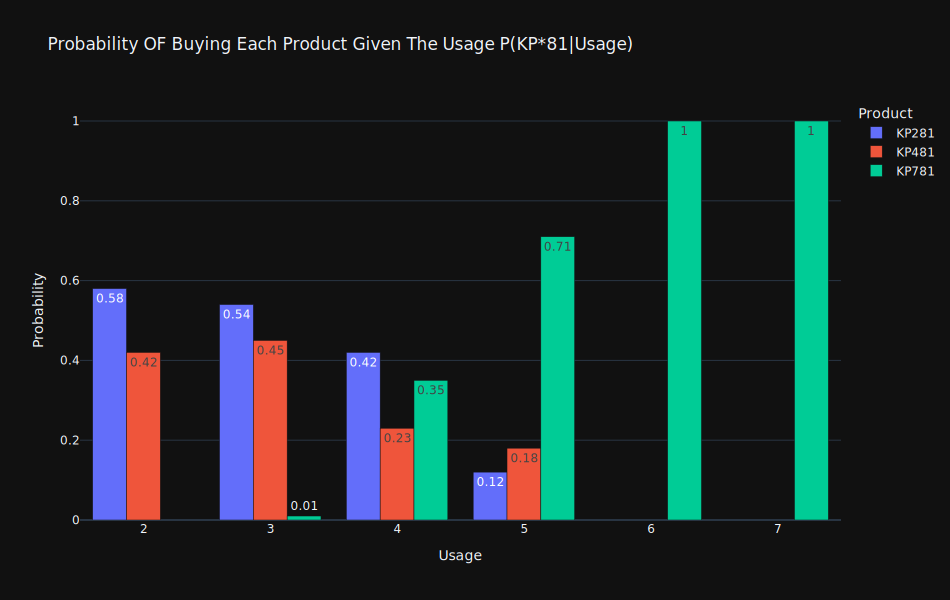

In [80]:
prob_plot('Usage')

***Key Insights:***

- **Lower Usage (2-3 Days)**:
  - **KP281** has the highest preference, with probabilities of **57.58%** and **53.62%**, respectively.
  - Minimal interest in **KP781**.

- **Moderate Usage (4 Days)**:
  - Preferences are balanced between **KP281 (42.31%)** and **KP781 (34.62%)**.

- **Higher Usage (5 Days)**:
  - Overwhelming preference for **KP781 (70.59%)**.

- **Exclusive High Usage (6-7 Days)**:
  - **KP781** is the sole choice, with **100% probability**.

- **KP281**:
  - Focus on customers with **2-3 days of usage**, as they show the strongest interest.

- **KP781**:
  - Prioritize marketing efforts toward **5-7 day users**, where this product dominates preferences.

- **KP481**:
  - Target **2-4 day users**, where interest is moderate but significant.




Fitness (Marginal and Joint Probabilities)
P(Fitness ∩ Product) = 


Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.56%,0.56%,0.00%,1.11%
2,7.78%,6.67%,0.00%,14.44%
3,30.00%,21.67%,2.22%,53.89%
4,5.00%,4.44%,3.89%,13.33%
5,1.11%,0.00%,16.11%,17.22%
All,44.44%,33.33%,22.22%,100.00%


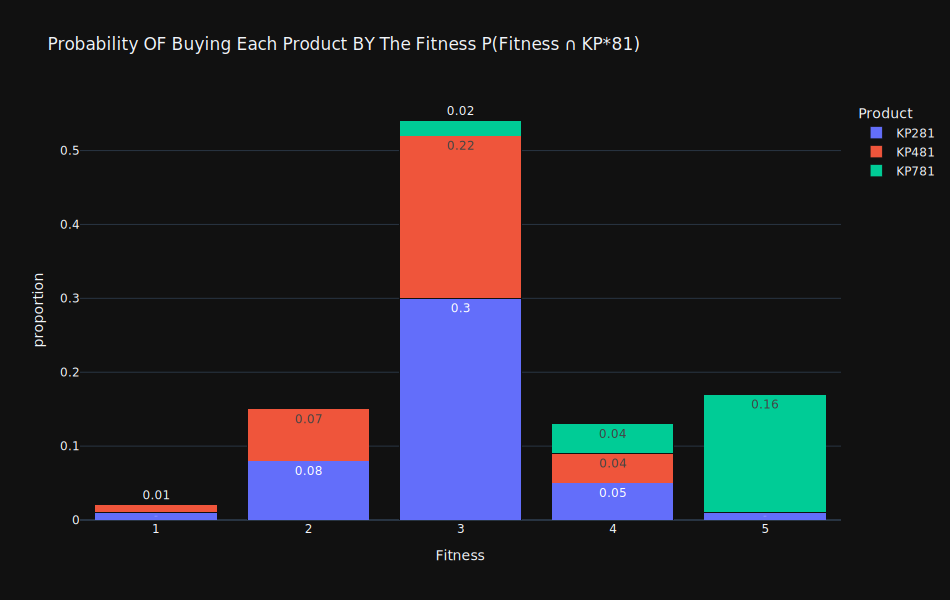



#Fitness (Conditional Probabilities)
P(Product|Fitness) = 


Product,KP281,KP481,KP781
Fitness,,,
1,50.00%,50.00%,0.00%
2,53.85%,46.15%,0.00%
3,55.67%,40.21%,4.12%
4,37.50%,33.33%,29.17%
5,6.45%,0.00%,93.55%
All,44.44%,33.33%,22.22%


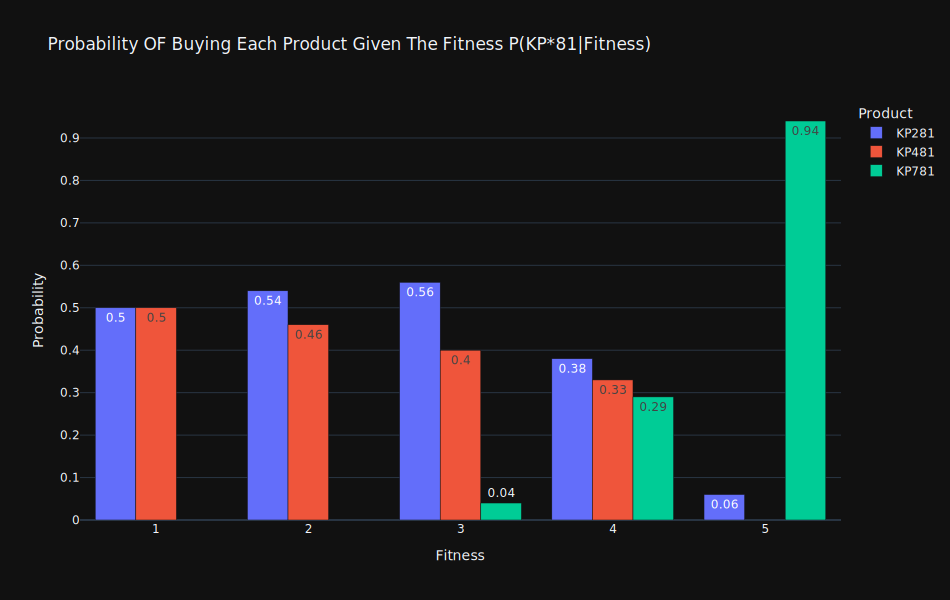

In [81]:
prob_plot('Fitness')


***Key Insights:***

- **Fitness Level 1**:
  - Equal preference for **KP281** and **KP481** (**50%** each).
  - No purchases of **KP781**.
  - Represents a very small portion of the dataset (**1.11%**).

- **Fitness Level 2**:
  - Balanced preference between **KP281** (**53.85%**) and **KP481** (**46.15%**).
  - No purchases of **KP781**.
  - Total contribution is modest (**14.44%**).

- **Fitness Level 3**:
  - Strong preference for **KP281** (**55.67%**) and moderate for **KP481** (**40.21%**).
  - Minimal interest in **KP781** (**4.12%**).
  - Represents the largest segment of customers (**53.89%**).

- **Fitness Level 4**:
  - Balanced interest across all products: **KP281** (**37.50%**), **KP481** (**33.33%**), and **KP781** (**29.17%**).
  - Contributes **13.33%** of the dataset.

- **Fitness Level 5**:
  - Overwhelming preference for **KP781** (**93.55%**).
  - Minimal interest in **KP281** (**6.45%**) and none in **KP481**.
  - Significant contribution to **KP781** sales (**17.22%**).

---


1. **KP281**:
   - Focus marketing efforts on **Fitness Levels 2 and 3**, where this product is preferred (**53.85%** and **55.67%** respectively).
   - Explore opportunities to engage **Fitness Level 5** customers, where interest is minimal (**6.45%**).

2. **KP481**:
   - Target **Fitness Levels 2 and 3**, where preferences are **46.15%** and **40.21%** respectively.
   - Investigate reasons for lack of interest among **Fitness Level 5** customers and develop tailored strategies.

3. **KP781**:
   - Prioritize **Fitness Level 5** customers, where preference is overwhelming (**93.55%**).
   - Consider strategies to introduce **KP781** to **Fitness Levels 2 and 3**, where current interest is negligible (**0%** and **4.12%** respectively).





#Age_Group,Gender (Conditional Probabilities)
P(Product|Age_Group,Gender) = 


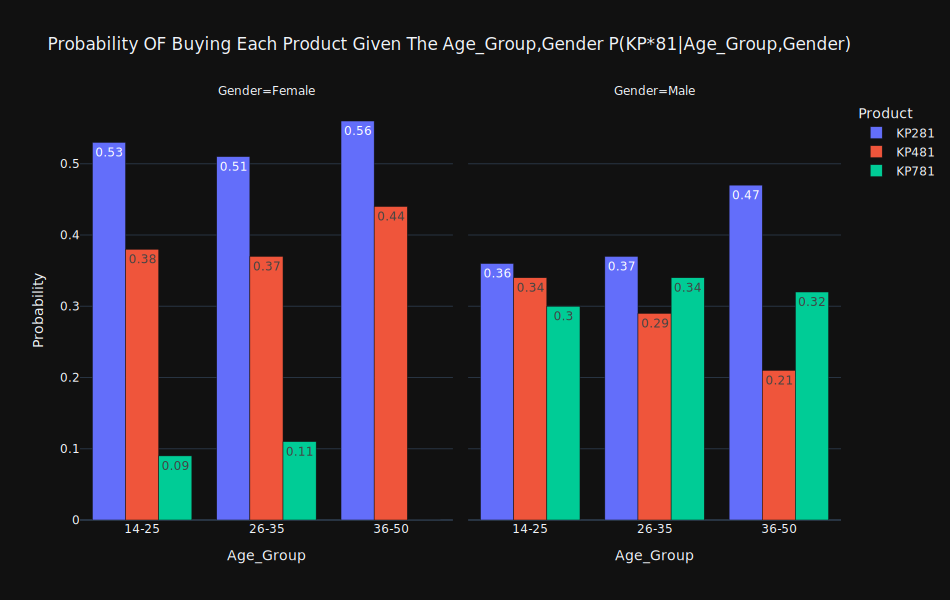

In [82]:
prob_plot2(['Age_Group','Gender'])

***Insights***

- **Age Group 14-25**:
  - **Females** prefer **KP281** (53.12%) and **KP481** (37.50%); **KP781** is least preferred (9.38%).
  - **Males** have a more balanced preference: **KP281** (36.17%), **KP481** (34.04%), **KP781** (29.79%).

- **Age Group 26-35**:
  - **Females** prefer **KP281** (51.43%) and **KP481** (37.14%); low preference for **KP781** (11.43%).
  - **Males** prefer **KP781** (34.21%) over **KP281** (36.84%) and **KP481** (28.95%).

- **Age Group 36-50**:
  - **Females** strongly prefer **KP281** (55.56%) and **KP481** (44.44%); **KP781** has no preference (0%).
  - **Males** prefer **KP281** (47.37%) and **KP781** (31.58%) over **KP481** (21.05%).

***Key Takeaways***:
- **Females** prefer **KP281** across all age groups.
- **Males** aged 26-35 show a stronger preference for **KP781**.




#Fitness,Gender (Conditional Probabilities)
P(Product|Fitness,Gender) = 


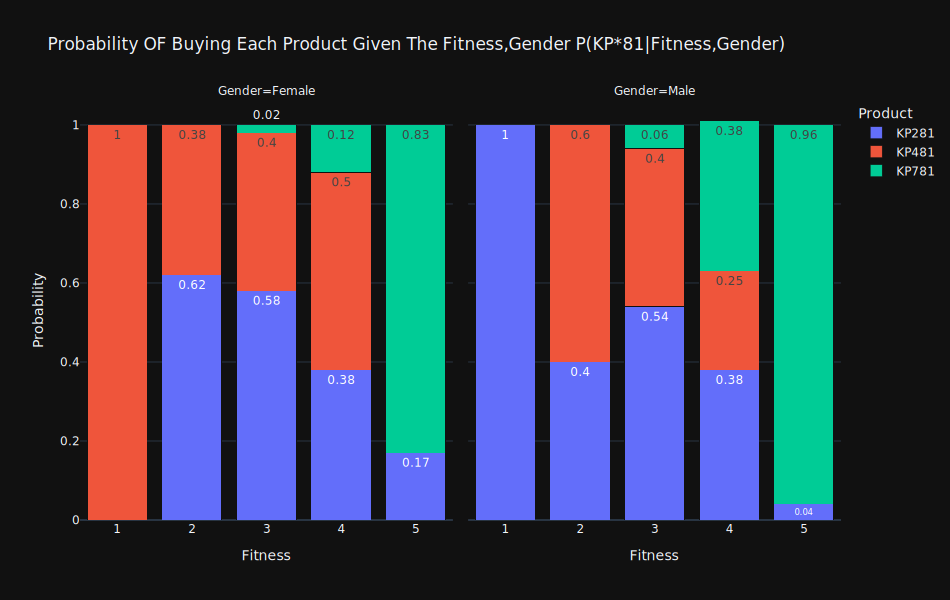

In [83]:
prob_plot2(['Fitness','Gender'],barmode='stack')

***Insights***:

- **Fitness Level 1**:
  - **Females** prefer **KP481** (100%).
  - **Males** prefer **KP281** (100%).

- **Fitness Level 2**:
  - **Females** prefer **KP281** (62.50%) and **KP481** (37.50%).
  - **Males** prefer **KP481** (60%) over **KP281** (40%).

- **Fitness Level 3**:
  - **Females** prefer **KP281** (57.78%) and **KP481** (40%); small preference for **KP781** (2.22%).
  - **Males** prefer **KP281** (53.85%) and **KP481** (40.38%); small preference for **KP781** (5.77%).

- **Fitness Level 4**:
  - **Females** prefer **KP481** (50%) and **KP781** (12.50%); lower preference for **KP281** (37.50%).
  - **Males** have a more balanced preference: **KP281** (37.50%), **KP781** (37.50%), and **KP481** (25%).

- **Fitness Level 5**:
  - **Females** prefer **KP781** (83.33%) with a small preference for **KP281** (16.67%).
  - **Males** show a strong preference for **KP781** (96%) and a minimal preference for **KP281** (4%).
---
***Key Takeaways***:
- **Females** with higher fitness levels (Level 5) show a strong preference for **KP781**.
- **Males** show a preference for **KP281** at lower fitness levels, shifting towards **KP781** at higher fitness levels.




#MaritalStatus,Gender (Conditional Probabilities)
P(Product|MaritalStatus,Gender) = 


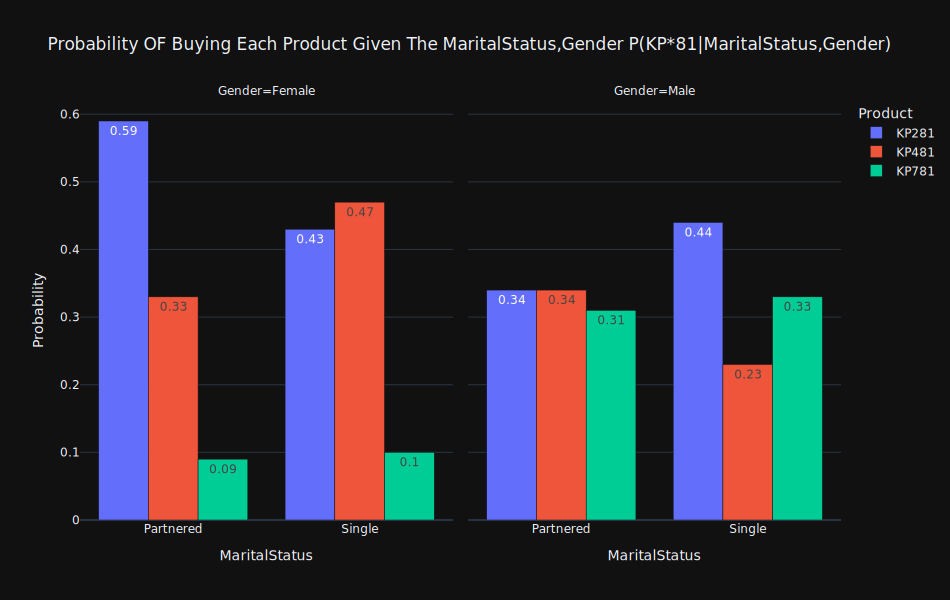

In [84]:
prob_plot2(['MaritalStatus','Gender'])

***Insights***:

- **Partnered**:
  - **Females** prefer **KP281** (58.70%) and **KP481** (32.61%); lower preference for **KP781** (8.70%).
  - **Males** have a balanced preference: **KP281** (34.43%), **KP481** (34.43%), and **KP781** (31.15%).

- **Single**:
  - **Females** prefer **KP481** (46.67%) over **KP281** (43.33%); low preference for **KP781** (10%).
  - **Males** prefer **KP281** (44.19%) and **KP781** (32.56%); lower preference for **KP481** (23.26%).

***Key Takeaways***:
- **Females** in the partnered group favor **KP281**, while **males** show balanced preferences.
- **Single females** prefer **KP481**, while **single males** prefer **KP281** and **KP781**.




#Education_Category,Gender (Conditional Probabilities)
P(Product|Education_Category,Gender) = 


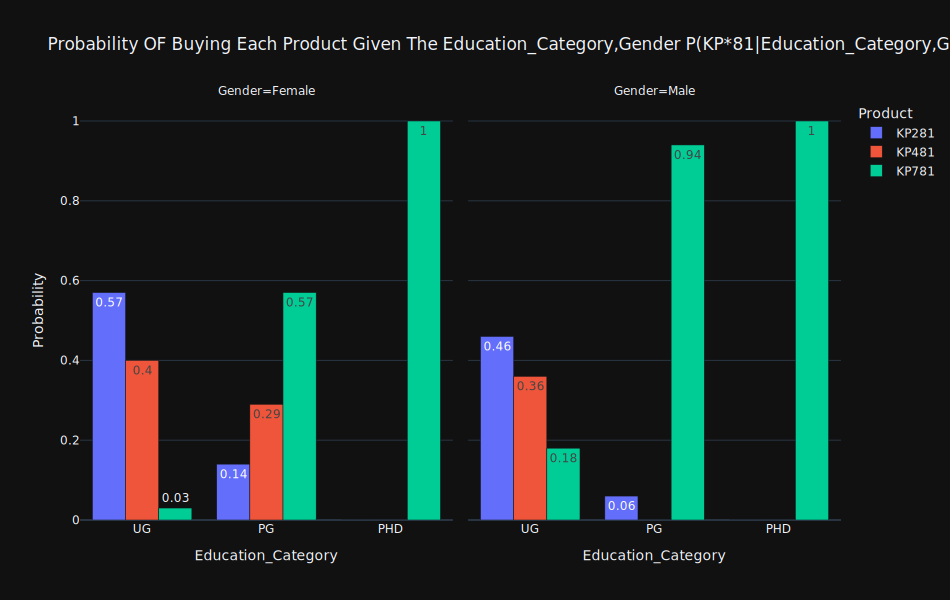

In [85]:
prob_plot2(['Education_Category','Gender'])

***Insights***:

- **UG (Undergraduate)**:
  - **Females** prefer **KP281** (57.35%) and **KP481** (39.71%); low preference for **KP781** (2.94%).
  - **Males** prefer **KP281** (45.88%) and **KP781** (17.65%); moderate preference for **KP481** (36.47%).

- **PG (Postgraduate)**:
  - **Females** prefer **KP781** (57.14%) with a small preference for **KP481** (28.57%) and **KP281** (14.29%).
  - **Males** show a strong preference for **KP781** (93.75%); no preference for **KP481** (0%) or **KP281** (6.25%).

- **PHD**:
  - **Females** and **Males** both have a strong preference for **KP781** (100%) and no preference for other products.

***Key Takeaways***:
- **Females** with UG education prefer **KP281** and **KP481**, while those with PG and PHD education strongly prefer **KP781**.
- **Males** with UG education show a balanced preference, while those with PG and PHD education have a clear preference for **KP781**.




#Income_Category,Gender (Conditional Probabilities)
P(Product|Income_Category,Gender) = 


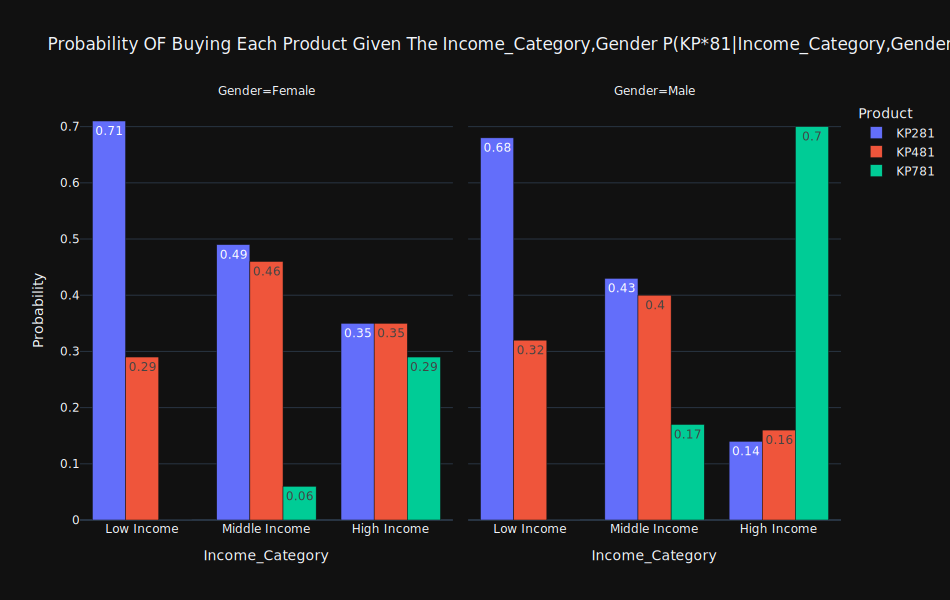

In [86]:
prob_plot2(['Income_Category','Gender'])

***Insights***:

- **Low Income**:
  - **Females** prefer **KP281** (70.83%) over **KP481** (29.17%); no preference for **KP781** (0%).
  - **Males** prefer **KP281** (68%) over **KP481** (32%); no preference for **KP781** (0%).

- **Middle Income**:
  - **Females** show a balanced preference between **KP281** (48.57%) and **KP481** (45.71%) with a small preference for **KP781** (5.71%).
  - **Males** have a balanced preference for **KP281** (42.86%) and **KP481** (40.48%), with a notable preference for **KP781** (16.67%).

- **High Income**:
  - **Females** show a balanced preference between **KP281** (35.29%) and **KP481** (35.29%), with a small preference for **KP781** (29.41%).
  - **Males** show a strong preference for **KP781** (70.27%), followed by **KP481** (16.22%) and **KP281** (13.51%).

***Key Takeaways***:
- **Females** in the low-income category prefer **KP281**, while those in middle and high-income categories show a more balanced preference.
- **Males** in the low-income category prefer **KP281**, while those in middle-income prefer **KP781**, and high-income males show a strong preference for **KP781**.


# ***CUSTOMER PROFILING :***



**Customer Profile for KP281 Treadmill**
- **Probability of Purchase:** **44%**
- **Product Type:** **Entry-level treadmill**
- **Age:** **18 to 35 years** (some **35-50 years**)
- **Education Level:** **13 years and above**
- **Annual Income:** **$35k to $55k USD**
- **Weekly Usage:** **3 to 4 times**
- **Fitness Scale:** **2 to 4** (**moderate**)
- **Weekly Running Mileage:** **50 to 100 miles**
- **Gender Preference:** **Single Female & Partnered Male**
- **Customer Type:** **Affordable, entry-level treadmill** for fitness beginners
- **Demographics:**
  - **Gender Preference:** Primarily **Single Female** and **Partnered Male** prefer this product
  - **Customer Type:** Ideal for customers looking for an **entry-level treadmill** at an **affordable price point** to enhance **fitness routines**.

---

**Customer Profile for KP481 Treadmill**
- **Probability of Purchase:** **33%**
- **Product Type:** **Intermediate-level treadmill**
- **Age:** **18 to 35 years** (some **35-50 years**)
- **Education Level:** **13 years and above**
- **Annual Income:** **$40k  to  $80k USD**
- **Weekly Usage:** **2 to 4 times**
- **Fitness Scale:** **2 to 4** (**moderate**)
- **Weekly Running Mileage:** **50 to 200 miles**
- **Gender Preference:** **Higher purchase probability in females**
- **Customer Type:** **Versatile treadmill** for intermediate users
-**Demographics:**
  - **Gender Preference:** **Female** customers show a significantly higher probability of purchasing this model over **males**.
  - **Customer Type:** Ideal for individuals at an **intermediate fitness level** who want a **reliable and versatile treadmill** for a consistent workout.

---

**Customer Profile for KP781 Treadmill**
- **Probability of Purchase:** **22%**
- **Product Type:** **Advanced-level treadmill**
- **Age:** **18 to 35 years**
- **Education Level:** **15 years and above**
- **Annual Income:** **$80k and above**
- **Weekly Usage:** **4 to 7 times**
- **Fitness Scale:** **3 to 5** (**high**)
- **Weekly Running Mileage:** **100+ miles**
- **Gender Preference:** **Partnered Female**
- **Customer Type:** **High-performance treadmill** for fitness enthusiasts
-**Demographics:**
  - **Gender Preference:** **Partnered Female** customers prefer this model compared to **partnered males**.
  - **Customer Type:** Ideal for **fitness enthusiasts** or **professionals** who need a **high-performance treadmill** for **rigorous, daily usage**.

---

**Summary of Probabilities:**
- **KP281:** **44% probability** of purchase, appealing to **entry-level customers** with **moderate fitness goals**, primarily **young women** and **men** at an **affordable price range**.
- **KP481:** **33% probability** of purchase, targeting **intermediate users**, with a higher probability of purchase from **females** aged **18-35 years** with **moderate to high income**.
- **KP781:** **22% probability** of purchase, ideal for **advanced fitness enthusiasts**, predominantly **partnered females** with **higher income levels** and **higher fitness demands**, ideal for **rigorous, high-frequency use**.



#***RECOMMENDATION'S:***

**1. Promote KP281 for Budget-Conscious Beginners**  
- **Recommendation:** Target budget-conscious, entry-level customers.  
- **Actionable Insight:** Focus on affordable pricing and highlight ease of use to attract first-time treadmill buyers.

**2. Highlight KP481's Versatility for Intermediate Users**  
- **Recommendation:** Position KP481 as the perfect choice for intermediate users.  
- **Actionable Insight:** Emphasize its high-performance features and reasonable price for customers looking to upgrade from entry-level models.

**3. Target Female Demographics for KP481**  
- **Recommendation:** Increase focus on female customers for KP481.  
- **Actionable Insight:** Tailor marketing materials to appeal to the needs and preferences of women, showcasing features that cater to their fitness goals.

**4. Position KP781 as a High-End Fitness Solution**  
- **Recommendation:** Market KP781 as a premium, high-performance treadmill.  
- **Actionable Insight:** Highlight its durability, advanced features, and suitability for professional athletes and fitness enthusiasts.

**5. Develop Payment Plans for KP281 & KP481**  
- **Recommendation:** Offer flexible payment options for KP281 and KP481.  
- **Actionable Insight:** Introduce EMIs and discounts to make these models more accessible to budget-conscious customers.

**6. Create Custom Workouts with App Integration**  
- **Recommendation:** Integrate a user-friendly app with personalized workout plans.  
- **Actionable Insight:** Enhance customer engagement by providing features like personalized training, mileage tracking, and fitness progress reports.

**7. Appeal to Fitness Enthusiasts for KP781**  
- **Recommendation:** Target high-income fitness enthusiasts for KP781.  
- **Actionable Insight:** Develop exclusive ads showcasing the product’s performance and long-term durability, emphasizing its benefits for intense users.

**8. Attract Younger, Tech-Savvy Consumers**  
- **Recommendation:** Focus on attracting younger, tech-savvy consumers.  
- **Actionable Insight:** Highlight the innovative features and app integrations of KP481 and KP281, appealing to the growing trend of connected fitness.

**9. Create Inclusive Campaigns for Female Fitness**  
- **Recommendation:** Encourage female customers to embrace fitness with Aerofit.  
- **Actionable Insight:** Craft campaigns that celebrate female empowerment and emphasize the benefits of fitness with Aerofit products.

**10. Expand Marketing to Older Demographics**  
- **Recommendation:** Broaden the target market to include older customers.  
- **Actionable Insight:** Adjust marketing strategies for KP781 to appeal to those over 40, focusing on health benefits, durability, and ease of use.
---
|o|
<h1> ---------> |) Thank You</h1>
|o|

---